In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
ins = pd.read_csv('insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


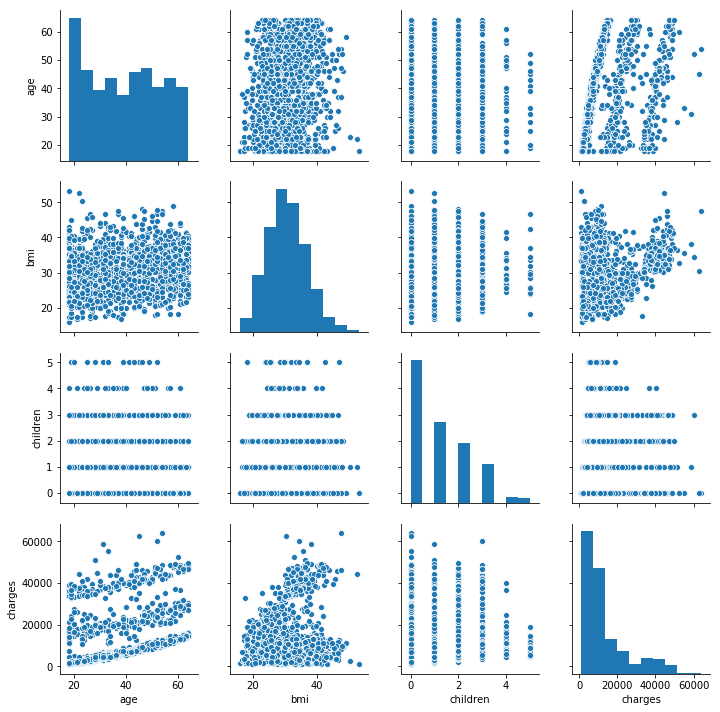

In [5]:
sns.pairplot(ins)

Distribution of individual features is shown in the main diagonal
BMI is fairly symmetric , charges and no. of children are right skewed 

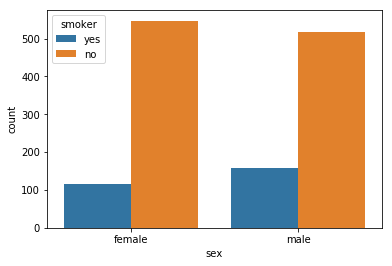

In [6]:
sns.countplot(ins['sex'],hue=ins['smoker']);

Male and Female are equally distributed with smokers higher among males 

In [7]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


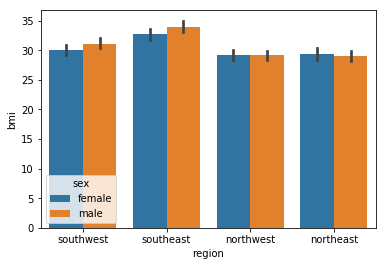

In [8]:
sns.barplot(ins['region'],ins['bmi'],hue=ins['sex']);

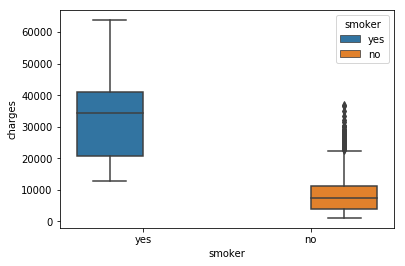

In [9]:
sns.boxplot(x="smoker", y = "charges", data = ins, hue="smoker")

Southeast region has a higher BMI and almost all of them have well over BMI = 24 indicating prevalence of unhealthy food habits 

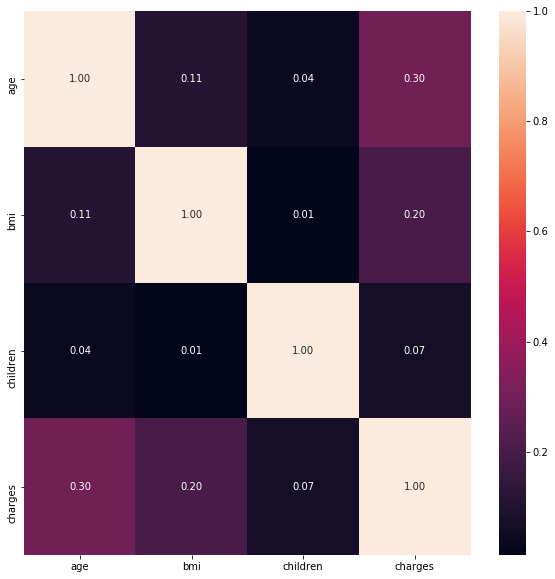

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(ins.corr(),annot=True,fmt='.2f');

There isn't really much correlation except an approx 30% correlation between Age and charges 

Higher the age higher the charge of insurance 

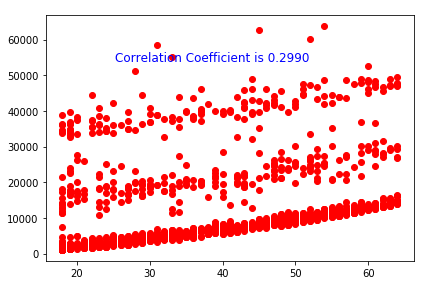

In [11]:
corr = np.corrcoef(ins.age,ins.charges)[0,1]
plt.scatter(ins.age,ins.charges, color = "r")
text = "\n\n\nCorrelation Coefficient is %1.4f"%corr
plt.suptitle(text, color="blue")
plt.tight_layout()


In [12]:
x = ins.drop('charges',axis=1)
y = ins.charges

In [13]:
x = pd.get_dummies(x)
x.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

# OLS model 

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [15]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
x = sm.add_constant(x)
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     373.7
Date:                Sat, 25 May 2019   Prob (F-statistic):          2.28e-302
Time:                        13:30:41   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.176e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -91.5779    484.649     -0.189      0.850   -1042.558     859.402
age                263.7506     13.484     19.560      0.000     237.292     290.209
bmi                311.5718     32.243      9.663      0.000     248.304     374.839
children           473.0456    158.827      2.978      0.003     161.395     784.696
sex_female         -52.0966    302.582     -0.172      0.863    -645.825     541.631
sex_male           -39.4813    312.009     -0.127      0.899    -651.707     572.744
smoker_no        -1.179e+04    321.715    -36.655      0.000   -1.24e+04   -1.12e+04
smoker_yes         1.17e+04    357.187     32.758      0.000     1.1e+04    1.24e+04
region_northeast   586.7043    345.584      1.698      0.090     -91.402    1264.810
region_northwest   183.0810    341.487      0.536      0.592    -486.986     853.148
region_southeast  -330.6261    374.931     -0.882      0.378   -1066.316     405.064
region_southwest  -530.7371    352.381     -1.506      0.132   -1222.180     160.706
==============================================================================
Omnibus:                      257.079   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.731
Skew:                           1.291   Prob(JB):                    2.93e-132
Kurtosis:                       5.630   Cond. No.                     8.48e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.91e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# OLS without train test split 

In [16]:
modelxy = sm.OLS(y,x).fit()
fullypred = modelxy.predict(x)
modelxy.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 25 May 2019   Prob (F-statistic):               0.00
Time:                        13:30:41   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -296.4168    430.507     -0.689      0.491   -1140.964     548.130
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_female         -82.5512    269.226     -0.307      0.759    -610.706     445.604
sex_male          -213.8656    274.976     -0.778      0.437    -753.299     325.568
smoker_no        -1.207e+04    282.338    -42.759      0.000   -1.26e+04   -1.15e+04
smoker_yes        1.178e+04    313.530     37.560      0.000    1.12e+04    1.24e+04
region_northeast   512.9050    300.348      1.708      0.088     -76.303    1102.113
region_northwest   159.9411    301.334      0.531      0.596    -431.201     751.083
region_southeast  -522.1170    330.759     -1.579      0.115   -1170.983     126.749
region_southwest  -447.1459    310.933     -1.438      0.151   -1057.119     162.827
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     6.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.59e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
# R Square Values
print(modelxy.rsquared)
print(modelxy.rsquared_adj)

0.7509130345985207
0.7494136397729286


In [18]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures()

In [19]:
# Transformed the Input Variabes for a better modelling
x = pf.fit_transform(x)

In [20]:
# Building the Model
ins_model = sm.OLS(y,x).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(x) # Making Prediction on X values 
st_residual = ins_model.get_influence().resid_studentized_internal

In [21]:
# Find the Rsquare
print(ins_model.rsquared)
print(ins_model.rsquared_adj)


0.8477668880499398
0.8435544422158106


With the polynomial regression model the rsquared value is 84.77% 

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mean_absolute_error(y, ins_pred)

2834.643410717448

In [24]:
np.sqrt(mean_squared_error(y, ins_pred))

4723.20456650819

In [25]:
import scipy.stats as stats
import pylab

# Find the Standardized Residual
st_residual = model.get_influence().resid_studentized_internal


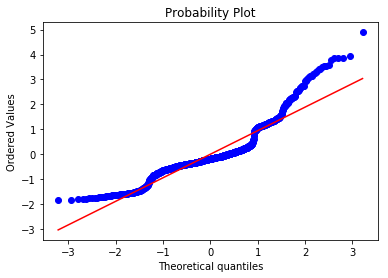

In [26]:
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

As it can be seen the residuals are not following the straight line and are not normal enough 

In [27]:
# Finding the Values
fittedvalues = model.fittedvalues
residuals = model.resid
st_residual = model.get_influence().resid_studentized_internal

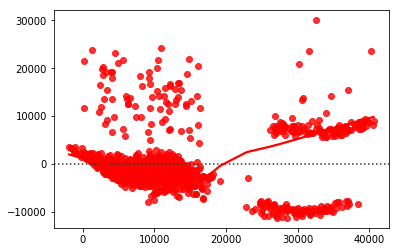

In [28]:
# Residual Plot
import seaborn as sns
sns.residplot(fittedvalues, residuals, color="r", lowess=True)

# Sklearn model 

In [153]:
from sklearn.linear_model import LinearRegression , SGDRegressor
lm = LinearRegression() 
model1 = lm.fit(x_train, y_train)

In [154]:
ypred = lm.predict(x_test)

In [155]:
print('The intercept is ',lm.intercept_)

The intercept is  -206.05018831725647


In [156]:
x.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [157]:
print('The coefficients are : ',lm.coef_)

The coefficients are :  [ 0.00000000e+00  2.63750608e+02  3.11571755e+02  4.73045625e+02
 -6.30763744e+00  6.30763744e+00 -1.17465727e+04  1.17465727e+04
  6.09598800e+02  2.05975445e+02 -3.07731627e+02 -5.07842618e+02]


In [158]:
from sklearn.metrics import r2_score
print('Rsquared score is ',r2_score(y_test, lm.predict(x_test)))

Rsquared score is  0.7946968492150819


# Gradient Descent 

In [152]:
#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run():
    points = genfromtxt("insurance.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run()

Starting gradient descent at b = 0, m = 0, error = nan
Running...
After 1000 iterations b = nan, m = nan, error = nan


In [106]:
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(x_train , y_train )


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [111]:
yy = clf.predict(x_test)

In [146]:
xx = x_test.iloc[:,1]
x_test.shape

(268, 12)

In [183]:
# Building the model
m = 0
c = 0
m_list = []
c_list = []
error = []
L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(xx)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*xx + c  # The current predicted value of Y
    D_m = (-2/n) * sum(xx * (y_test - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y_test - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    error.append(((y_test - Y_pred)**2)*(1/2*(len(y_test))))
    m_list.append(m)
    c_list.append(c)
    
print (m, c)
len(c_list)

333.69032621120766 157.31682419873678


1000

In [187]:
ss= pd.DataFrame([m_list,c_list,error])
ss = ss.T
error

[12      4.472056e+08
 306     5.455655e+10
 318     7.379933e+09
 815     4.725669e+08
 157     3.226907e+10
 244     1.167967e+11
 642     2.315000e+10
 968     1.441510e+09
 142     4.823405e+10
 1034    2.247238e+10
 401     8.756868e+09
 858     4.447479e+10
 347     9.308066e+09
 423     9.967837e+08
 268     7.419482e+09
 29      2.008046e+11
 1105    1.432373e+10
 568     1.788493e+10
 361     3.024737e+09
 116     1.735763e+10
 97      1.401330e+10
 840     3.121702e+08
 675     6.990598e+09
 1304    6.056279e+10
 718     1.576939e+10
 577     4.596965e+11
 546     1.431838e+09
 330     3.154298e+11
 1045    6.415522e+10
 789     2.426964e+10
             ...     
 1192    2.271281e+10
 204     6.844869e+09
 1128    2.762579e+10
 277     6.196853e+08
 431     3.225763e+09
 1022    2.387585e+11
 213     3.353730e+09
 800     6.653943e+09
 195     3.602144e+08
 573     1.339765e+11
 425     1.284013e+10
 880     1.588528e+09
 983     3.780401e+10
 104     3.355165e+09
 174     1

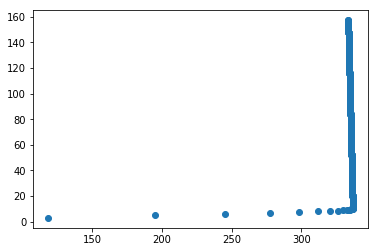

In [193]:
plt.scatter(ss[0],ss[1])

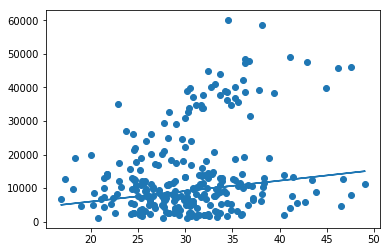

In [200]:
plt.scatter(x_test['bmi'],y_test)
yb = 311*x_test.bmi + (-206)
plt.plot(x_test.bmi , yb)

In [188]:
# xa = np.array(x_test)
from sklearn.metrics import accuracy_score
Y_pred = m*x_test.iloc[:,1] + c
r2_score(y_test,Y_pred)
# plt.scatter(xa, y_test) 
# plt.plot([min(xa), max(xa)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
# plt.show()

0.008132581094413283

In [192]:

import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()

trace1 = go.Scatter3d(
    x=ss[0],
    y=ss[1],
    z=ss[2],
    mode='markers',
    marker=dict(
        size=12,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Shyam4801/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'


C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# Removing correlated columns 

In [ ]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

calculate_vif(x)

In [ ]:

xv = x[['age','children','sex_male','smoker_yes', 'region_northeast', 'region_northwest','region_southwest']]
yv = ins.charges

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(xv,yv,test_size = 0.2 , random_state = 100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
model = sm.OLS(yv,xv).fit()
ypredv = model.predict(xv)
yv.shape
model.summary()

As it can be seen , the Rsquare value is 86.8 % after removing the correlated columns using VIF function 